In [97]:
import pandas as pd
import numpy as np

from GPfates import GPfates


%matplotlib inline

In [2]:
tempfolder = "./"

In [3]:
log_expression_cutoff = 2
min_expression_cutoff = 2

In [4]:
etpm = pd.read_table('test.csv', index_col=0)
etpm = etpm[(etpm > 2).sum(1) > 2]
logexp = np.log10(etpm + 1)

cellinfo = pd.read_table('test_cellinfo.csv', index_col=0)

In [5]:
m = GPfates.GPfates(cellinfo, logexp)

In [6]:
print("Dimensionality reduction")
m.dimensionality_reduction()

Dimensionality reduction


In [163]:
ndims = 5

In [164]:
print("Story DR")

m.store_dr(dims=range(ndims)) # store the dr in the sample table (m.s), so it can be used in the gplvm

Story DR


In [165]:
print("Infer pseudotime")

m.infer_pseudotime(s_columns=['bgplvm_' + str(i) for i in range(ndims)])

Infer pseudotime


In [156]:
print("Model cell fates")

m.model_fates(C=3)

Model cell fates


In [112]:
m.s.pseudotime.to_csv(tempfolder + "pseudotimes.csv")

In [113]:
pd.DataFrame(m.fate_model.phi, index=m.s.pseudotime.index).to_csv(tempfolder + "phi.csv")

In [114]:
p = m.identify_bifurcation_point()

p

1.0405504487310797

In [267]:
m.calculate_bifurcation_statistics()

 /usr/local/lib/python3.4/dist-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


In [115]:
dr = m.dr_models["bgplvm"]
dr2 = dr.X.mean[:, :]
pd.DataFrame(dr2.tolist(), index=m.s.pseudotime.index).to_csv(tempfolder + "dr.csv")

In [154]:
from GPclust import OMGP
XY = m.s[['bgplvm_0', 'bgplvm_1']].as_matrix()
m.fates_viz = OMGP(m.fate_model.X, XY, prior_Z='DP')
m.fates_viz[:] = m.fate_model[:]
m.fates_viz.phi = m.fate_model.phi[:,0:2]
print(m.fate_model.X.shape)
print(XY.shape)

(168, 1)
(168, 2)


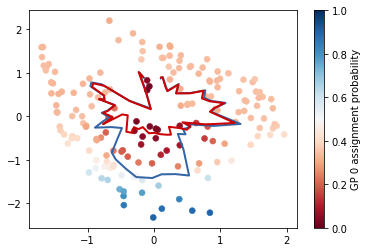

In [149]:
m.fates_viz.plot()

In [ ]:
self.fates_viz = OMGP(m.fate_model.X, XY, prior_Z='DP')

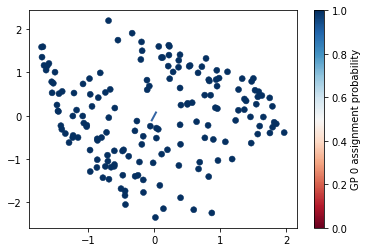

In [270]:
m.make_fates_viz(['bgplvm_0', 'bgplvm_1'])

m.fates_viz.plot(); GPfates.plt.show()